In [28]:
import numpy as np

In [29]:
from data_generator import DataGenerator

## Simulate a tree

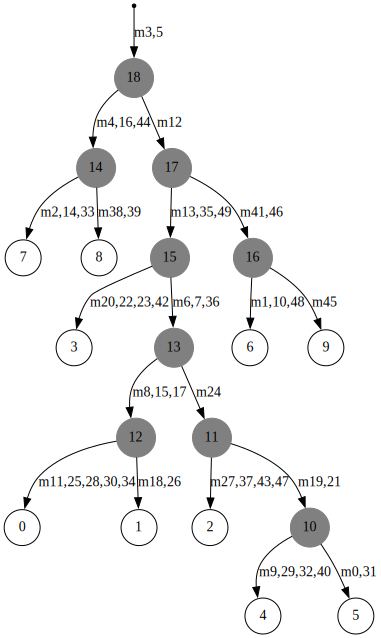

In [30]:
# Generate a random cell lineage tree with 10 samples and 50 mutations
generator = DataGenerator(10, 50)
generator.random_tree()

# Visualize the generated tree
# Cells are represented by white circles
# Ancestor cells are represented by grey circles
# Mutations are indicated on branches
generator.tree.to_graphviz()

In [31]:
# This can display the tree as a mutation tree instead, but has a bug
#from tree import MutationTree
#mut_tree = MutationTree()

In [32]:
#mut_tree.fit_structure(generator.tree)

In [33]:
# Alter the genotypes in a set of the mutation sites
# Here, 50% of the sites will be mutated
# 1/3 of the mutated sites will be homozygous for the reference allele
# 1/3 of the mutated sites will be homozygous for the alternative allele
# 1/3 of the mutated sites will be heterozygous
generator.random_mutations(mut_prop = 0.5, genotype_freq = [1/3, 1/3, 1/3])

In [34]:
# Print the genotype transitions
for gt1, gt2 in zip(generator.gt1, generator.gt2):
    print('%s->%s' % (gt1, gt2))

R->R
R->H
A->A
A->H
A->A
A->H
H->H
H->A
H->H
H->H
R->R
A->A
R->R
H->H
R->R
R->H
H->R
H->H
R->H
A->A
H->A
R->H
H->A
R->H
R->R
A->H
R->R
A->A
H->H
R->R
R->H
R->R
H->H
A->A
R->H
A->A
H->A
A->H
A->A
R->H
A->H
A->H
R->H
R->H
R->H
H->R
R->R
H->H
R->H
A->H


In [35]:
# Generate read counts matries for the tree data
ref, alt = generator.generate_reads()

In [36]:
i = 0 # cell index
j = 0 # locus index
print('Cell %d has %d reference reads and %d alternative reads at locus %d' % (i, ref[i,j], alt[i,j], j))

Cell 0 has 8 reference reads and 1 alternative reads at locus 0


### Select mutations to be used for inference

In [37]:
from mutation_detection import filter_mutations, likelihood_matrices
ref, alt, gt1, gt2 = filter_mutations(ref, alt, method = 'threshold', t = 0.5)

### In these sites, calculate likelihoods of each cell being mutated / not mutated

In [38]:
likelihoods1, likelihoods2 = likelihood_matrices(ref, alt, gt1, gt2)

In [39]:
print(gt1[0], gt2[0])

A H


In [40]:
i = 0
j = 0
print('Likelihood of cell %d being wildtype at locus %d is %f' % (i, j, np.exp(likelihoods1[i,j])))
print('Likelihood of cell %d being mutated at locus %d is %f' % (i, j, np.exp(likelihoods2[i,j])))

Likelihood of cell 0 being wildtype at locus 0 is 0.740707
Likelihood of cell 0 being mutated at locus 0 is 0.020482


## Tree inference

In [41]:
from tree_inference import TreeOptimizer
optimizer = TreeOptimizer()
optimizer.fit(likelihoods1, likelihoods2, reversible = True)